In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to load
file = "Seasons_stats2.csv"

#Reading file and storing to dataframe
nba_data = pd.read_csv(file)

nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


**Adding Minutes/Game Calculation to the CSV**

In [4]:
#Dropping NA/NaN values throughout the CSV
#nba_data.dropna(how='any', inplace=True)

# Adding new calculated columns to data frame
# Minutes per game
nba_data['MPG'] = nba_data['MP'] / nba_data['G']
#nba_data['MPG'] = nba_data['MPG'].map('{:.1f}'.format)
# Points per game
nba_data['PPG'] = nba_data['PTS'] / nba_data['G']
# Offensive rebounds per game
nba_data['ORBG'] = nba_data['ORB'] / nba_data['G']
# Assists per game
nba_data['APG'] = nba_data['AST'] / nba_data['G']
# Field Goal attempts per game
nba_data['FGAG'] = nba_data['FGA'] / nba_data['G']
# 3pointer made per game
nba_data['3PG'] = nba_data['3P'] / nba_data['G']


#Format columns
#stat_format = "{:,.1f}"
#perc_format = "{:,.2f}%"

#nba_data.style.format({'MPG': stat_format})



nba_data.head()









#DELETE BELOW THIS ROW


#Setting the G, MP, and GS columns equal to non-NA/NaN values only
#player_data = player_data[player_data['G'].notna()]
#player_data = player_data[player_data['MP'].notna()]
#player_data = player_data[player_data['GS'].notna()]

#Converting the G, MP columns to numberic dtype

nba_data['G'] = pd.to_numeric(nba_data['G'])
nba_data['MP'] = pd.to_numeric(nba_data['MP'])
nba_data['Year'] = pd.to_numeric(nba_data['Year'])

#player_data['FGA'] = pd.to_numeric(player_data['FGA'])

#Making new variables for G, MP
#games = player_data['G']
#minutes = player_data['MP']
#FGA = player_data['FGA']

#Calculation for new column called Minutes/Game
#minutes_per_game = minutes/games
#FGA_per_game = FGA/games

# #Adding Minutes/Game column to the CSV, mapping the column, converting to numeric dtype, applying comparison statement
# player_data['Minutes/Game'] = minutes_per_game
# player_data['Minutes/Game'] = player_data['Minutes/Game'].map('{:.1f}'.format)
# player_data['Minutes/Game'] = pd.to_numeric(player_data['Minutes/Game'])
# player_data = player_data.loc[(player_data['Minutes/Game'] >= 20) & (player_data['G'] >= 30)]
# player_data['AST'] = pd.to_numeric(player_data['AST'])
# player_data['APG'] = player_data['AST'] / player_data['G']
# player_data['ORB'] = pd.to_numeric(player_data['ORB'])
# player_data['ORBG'] = player_data['ORB'] / player_data['G']
# player_data['3P'] = pd.to_numeric(player_data['3P'])
# player_data['3PG'] = player_data['3P'] / player_data['G']

# #Adding FGA/Game column to the dataframe
# player_data['FGA/Game'] = FGA_per_game
# player_data['FGA/Game'] = player_data['FGA/Game'].map('{:.1f}'.format)
# player_data['FGA/Game'] = pd.to_numeric(player_data['FGA/Game'])



In [5]:
#Figuring out how many 'games played' we wnat to filer out

#Describe 'Games played column' gives us a starting point
nba_data['G'].describe()

count    24624.000000
mean        50.837110
std         26.496161
min          1.000000
25%         27.000000
50%         58.000000
75%         75.000000
max         88.000000
Name: G, dtype: float64

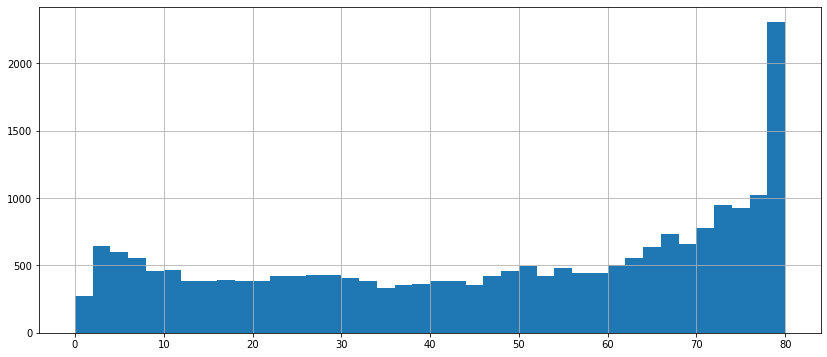

In [6]:
#PLotting histogram to gives us a visual of games played
bin_values = np.arange(start=0, stop = 82, step = 2)
nba_data['G'].hist(bins=bin_values, figsize=[14,6])

In [7]:
#Figuring out how many 'minutes played per game' we wnat to filer out

#Describe 'Games played column' gives us a starting point
nba_data['MPG'].describe()

count    24138.000000
mean        20.326823
std         10.378571
min          0.000000
25%         11.625000
50%         19.520396
75%         28.941346
max         48.525000
Name: MPG, dtype: float64

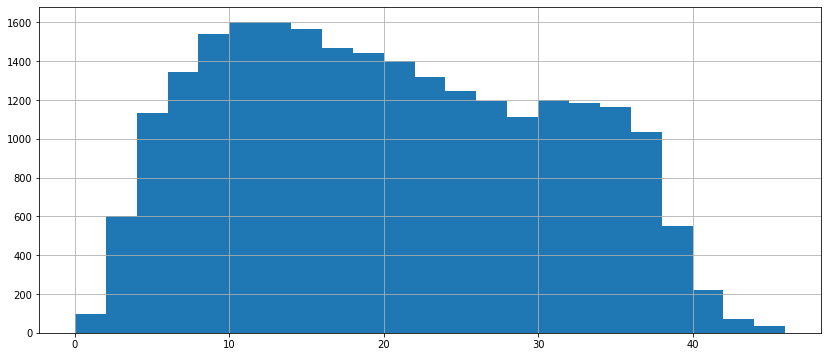

In [8]:
#Plotting histogram to gives us a visual of minutes per game
bin_values = np.arange(start=0, stop = 48, step = 2)
nba_data['MPG'].hist(bins=bin_values, figsize=[14,6])

In [9]:
#Filtering data to seasons after 1980, MPG(minutes per game) played, and G(total games played in the season) 
min_year = 1980
min_per_game = 10
min_gm_played = 10
player_data = nba_data[(nba_data['Year'] >= min_year) & (nba_data['MPG'] >= min_per_game) & (nba_data['G'] >= min_gm_played)]




player_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,MPG,PPG,ORBG,APG,FGAG,3PG
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,280.0,297.0,216.0,2034.0,38.329268,24.804878,2.317073,4.524390,16.865854,0.00
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,12.0,39.0,118.0,362.0,18.238806,5.402985,0.925373,1.298507,4.746269,0.00
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,55.0,218.0,237.0,1118.0,28.906667,14.906667,2.106667,4.293333,11.666667,0.00
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,10.0,242.0,218.0,1131.0,35.800000,14.137500,0.737500,8.387500,9.925000,0.05
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,15.0,27.0,66.0,86.0,21.538462,3.307692,1.115385,1.538462,2.307692,0.00


# Offensive Stat 1 - Player Scoring (Points/FG%)

In [10]:
#Creating a series from the CSV with Year, Player, PTS, and our new column Minutes/Game
player_points = player_data[['Year','Player', 'PTS', 'FG%', 'PPG', 'G', 'MPG']]

#Converting the PTS column to a numberica dtype
player_points['PTS'] = pd.to_numeric(player_points['PTS'])

#Sorting and displaying to check if the Minutes/Game column is calculating correctly
player_points = player_points.sort_values(by='PTS', ascending=False)
top_player_points = player_points.head(10)
top_player_points

/Users/fasterpermits/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Year,Player,PTS,FG%,PPG,G,MPG
8469,1987.0,Michael Jordan*,3041.0,0.482,37.085366,82.0,40.012195
8869,1988.0,Michael Jordan*,2868.0,0.535,34.975610,82.0,40.378049
17742,2006.0,Kobe Bryant,2832.0,0.450,35.400000,80.0,40.962500
9747,1990.0,Michael Jordan*,2753.0,0.526,33.573171,82.0,38.987805
9297,1989.0,Michael Jordan*,2633.0,0.538,32.506173,81.0,40.185185
22438,2014.0,Kevin Durant,2593.0,0.503,32.012346,81.0,38.543210
5848,1980.0,George Gervin*,2585.0,0.528,33.141026,78.0,37.615385
10212,1991.0,Michael Jordan*,2580.0,0.539,31.463415,82.0,37.000000
24654,2017.0,Russell Westbrook,2558.0,0.425,31.580247,81.0,34.592593
6557,1982.0,George Gervin*,2551.0,0.500,32.291139,79.0,35.658228


In [81]:
nba_year_input = input("Enter a year ")
nba_year_data = player_data[player_data['Year'] == int(nba_year_input)]
pts_mean = nba_year_data['PTS'].mean()
pts_median = nba_year_data['PTS'].median()
print(f"average scoring in {nba_year_input} was {pts_mean}")
print(f"median scoring in {nba_year_input} was {pts_median}")

Enter a year 1987
average scoring in 1987 was 733.3797909407665
median scoring in 1987 was 608.0


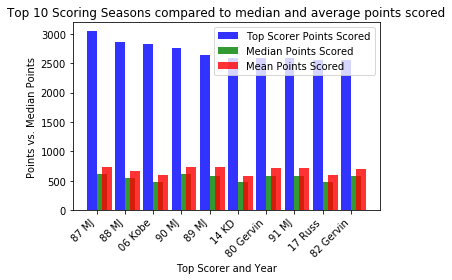

In [76]:
n_groups = 10
top_points_list = (3041, 2868, 2832, 2753, 2633, 2593, 2585, 2580, 2558, 2551)
median_points_list = (608, 552, 479, 621.5, 574.5, 481.5, 588, 581, 483.5, 578)
mean_points_list = (733.4, 659, 606, 727.5, 734.4, 585.6, 711.5, 718.4, 600.5, 695.8)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .35
opacity = 0.8

rects1 = plt.bar(index, top_points_list, bar_width, align = 'edge',
alpha=opacity,
color='b',
label='Top Scorer Points Scored')

rects2 = plt.bar(index + bar_width, median_points_list, bar_width, align = 'edge',
alpha=opacity,
color='g',
label='Median Points Scored')

rects3 = plt.bar(index + bar_width + bar_width, mean_points_list, bar_width, align = 'center',
alpha=opacity,
color='r',
label='Mean Points Scored')

plt.xlabel('Top Scorer and Year')
plt.ylabel('Points vs. Median Points')
plt.title('Top 10 Scoring Seasons compared to median and average points scored')

plt.xticks(index + bar_width, ('87 MJ', '88 MJ', '06 Kobe', '90 MJ', '89 MJ', '14 KD', '80 Gervin', '91 MJ', 
                                   '17 Russ', '82 Gervin'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

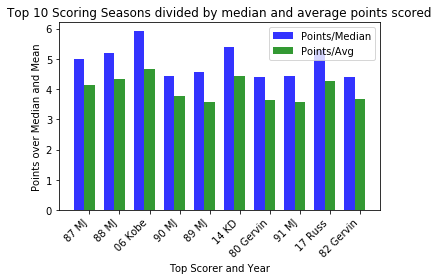

In [78]:
n_groups = 10
points_overmedian = (3041/608, 2868/552, 2832/479, 2753/621.5, 2633/574.5, 2593/481.5, 2585/588, 2580/581, 
                   2558/483.5, 2551/578)
points_overavg = (3041/733.4, 2868/659, 2832/606, 2753/727.5, 2633/734.4, 2593/585.6, 2585/711.5, 2580/718.4, 
                    2558/600.5, 2551/695.8)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .35
opacity = 0.8

rect1 = plt.bar(index, points_overmedian, bar_width, align = 'center',
alpha=opacity,
color='b',
label='Points/Median')

rect2 = plt.bar(index + bar_width, points_overavg, bar_width, align = 'center',
alpha=opacity,
color='g',
label='Points/Avg')

plt.xlabel('Top Scorer and Year')
plt.ylabel('Points over Median and Mean')
plt.title('Top 10 Scoring Seasons divided by median and average points scored')

plt.xticks(index + bar_width, ('87 MJ', '88 MJ', '06 Kobe', '90 MJ', '89 MJ', '14 KD', '80 Gervin', '91 MJ', 
                                   '17 Russ', '82 Gervin'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#Capomulin_Average_Tumor_Volume = Capomulin_df["Tumor Volume (mm3)"]
#Capomulin_Mouse_Weight = Capomulin_df["Weight (g)"]
# plt.scatter(Capomulin_Average_Tumor_Volume,Capomulin_Mouse_Weight)
# plt.xlabel("Tumor Volume (mm3)")
# plt.ylabel("Mouse Weight (g)")
# plt.show()

top_player_points.plot(kind="scatter", x="FG%", y="PTS", grid=True, figsize=(20,4),
                 title="Season Points by Player")
plt.annotate('Michael Jordan', xy=(0.486, 3041.0), xytext=(-20, 20), textcoords= 'offset points', ha='right', va='bottom')

#player_points.plt.scatter(x_axis, data, marker=“o”, facecolors=“red”, edgecolors=“black”, s=x_axis, alpha=0.75)

# Offensive Stat 2 - True Shooting Percentage

In [ ]:
# Filting player shooting to players who took more than 10 shots per game
attempts_filter = player_data['FGAG'] >= 10
player_shooting_attempts = player_data[attempts_filter]
player_shooting_attempts = player_shooting_attempts[['Year','Player','TS%', 'FG%', 'FGA', 'G', 'FGAG']]

# #Converting the PTS column to a numberica dtype
# player_TS['TS%'] = pd.to_numeric(player_TS['TS%'])

# #Sorting and displaying top shooters by TS%
player_shooting_attempts = player_shooting_attempts.sort_values(by='TS%', ascending=False)
top_player_shooting = player_shooting_attempts.head(20)
top_player_shooting

In [ ]:
top_player_shooting.plot(kind="scatter", x="FGA", y="TS%", grid=True, figsize=(20,4),
                 title="Attempts by Player")

# Offensive Stat 3 - Effective Field Goal Percentage (excludes free throws)

In [ ]:
#Creating a dataframe from the CSV with new effective field goal percentage with more than attempts per game
player_efg = player_data[attempts_filter]
player_efg = player_efg[['Year','Player', 'eFG%', 'G', 'PPG', 'FGA', 'FGAG']]

#Sorting players for eFG%
player_efg = player_efg.sort_values(by='eFG%', ascending=False)

player_efg.head(10)

# player_efg = player_data.loc[player_data['FGA/Game'] >= 10]
# player_efg['eFG%'] = pd.to_numeric(player_efg['eFG%'])
# player_efg = player_efg.sort_values(by='eFG%', ascending=False)
# player_efg = player_efg[['Year','Player', 'eFG%', 'G', 'FGA', 'FGA/Game']]
# player_efg.head(10)

# Offensive Stat 4 - Assits Per Game Played

In [ ]:
# Creating assists dataframe
player_apg = player_data[['Year','Player', 'APG', 'AST', 'G']]
player_apg = player_apg.sort_values(by='APG', ascending=False)
player_apg.head(10)



#player_apg['APG'] = player_apg['APG'].map('{:.1f}'.format)



# Offensive Stat 5 - Offensive Rebound Per Game Played

In [ ]:
#Creating offensive rebound dataframe
player_orbg = player_data[['Year','Player', 'ORBG', 'ORB', 'G']]
player_orbg = player_orbg.sort_values(by='ORBG', ascending=False)
player_orbg.head(10)

# Offensive Stat 6 - Three Pointers Made Per Game Played

In [ ]:
player_3pg = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'G']]
player_3pg = player_3pg.sort_values(by='3PG', ascending=False)
player_3pg.head(10)